# 1.2	Model implementation

In [1]:
import pandas as pd                
import numpy as np                 
import matplotlib.pyplot as plt    
import seaborn as sns 

Reading the Data

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\student_performance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   DP score                     1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Cleaning the data . Checking for null values in data

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
DP score                       0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()

,DP score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Checking each columns features

In [7]:
#1. Gender
count  = 0
for i in df['gender'].unique():
    count = count + 1
    print(count,'. ',i)

1 .  female
2 .  male


In [8]:
#2. Race/Ehtnicity of People
count = 0
for i in sorted(df['race/ethnicity'].unique()):
    count = count + 1
    print(count, '. ',i)
print('Number of different races/ethnicity of people: ', df['race/ethnicity'].nunique())

1 .  group A
2 .  group B
3 .  group C
4 .  group D
5 .  group E
Number of different races/ethnicity of people:  5


In [9]:
#3. Parent's level of Education
count = 0
for i in df['parental level of education'].unique():
    count = count + 1
    print(count, '. ', i)

1 .  bachelor's degree
2 .  some college
3 .  master's degree
4 .  associate's degree
5 .  high school
6 .  some high school


In [10]:
#4. Different types of lunches
count  = 0
for i in df['lunch'].unique():
    count = count + 1
    print(count,'. ',i)

1 .  standard
2 .  free/reduced


In [11]:
#5. Types of Test Prepration Course
count  = 0
for i in df['test preparation course'].unique():
    count = count + 1
    print(count,'.',i)

1 . none
2 . completed


# Exploratory Data Analysis

In [16]:

sns.set_style('darkgrid')

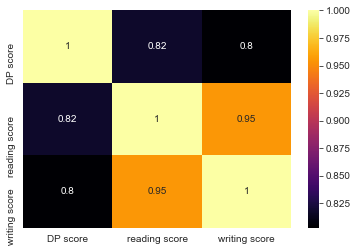

In [18]:
# Heatmap
sns.heatmap(df.corr(), annot = True, cmap='inferno')
plt.show()



There is strong correlation between a student's reading score & writing score, reading score & DP score and writing score & DP score

# Plotting the distribution of students marks

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


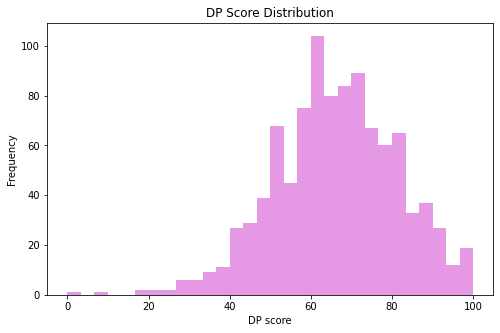

In [12]:
#1.DP Score

plt.figure(figsize=(8,5))
sns.distplot(df['DP score'], kde = False, color='m', bins = 30)
plt.ylabel('Frequency')
plt.title('DP Score Distribution')
plt.show()

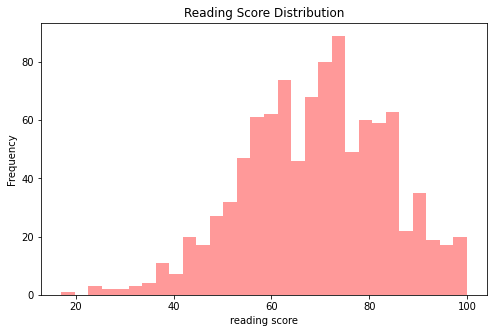

In [13]:
#2. Reading Score
plt.figure(figsize=(8,5))
sns.distplot(df['reading score'], kde = False, color='r', bins = 30)
plt.ylabel('Frequency')
plt.title('Reading Score Distribution')
plt.show()


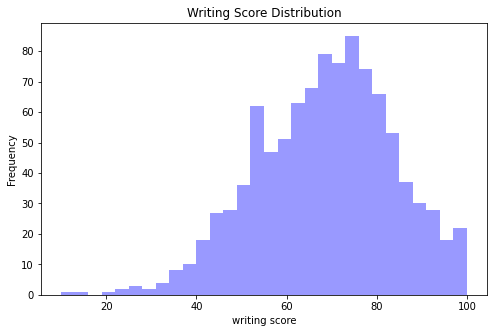

In [14]:
#3. Writing Score
plt.figure(figsize=(8,5))
sns.distplot(df['writing score'], kde = False, color='blue', bins = 30)
plt.ylabel('Frequency')
plt.title('Writing Score Distribution')
plt.show()

# Number of Students having maximum marks in all three categories

In [15]:
 
perfect_writing = df['writing score'] == 100
perfect_reading = df['reading score'] == 100
perfect_math = df['DP score'] == 100

perfect_score = df[(perfect_math) & (perfect_reading) & (perfect_writing)]
perfect_score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [16]:
print('Number of students having maximum marks in all three subjects: ',len(perfect_score))

Number of students having maximum marks in all three subjects:  3


In [17]:
perfect_writing = df['writing score'] == 100
perfect_reading = df['reading score'] == 100
perfect_DP = df['DP score'] == 100

perfect_score = df[(perfect_DP) & (perfect_reading) & (perfect_writing)]
perfect_score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


# Number of Students having minimum marks in all three categories

In [19]:
minimum_dp = df['DP score'] == 0
minimum_reading = df['reading score'] == 17
minimum_writing = df['writing score'] == 10



minimum_score = df[(minimum_dp) & (minimum_reading) & (minimum_writing)]
minimum_score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


# part c

# C.1 Results and analysis

# Data Visualization and Interpretation

1. Bar Plot of Scores according to gender


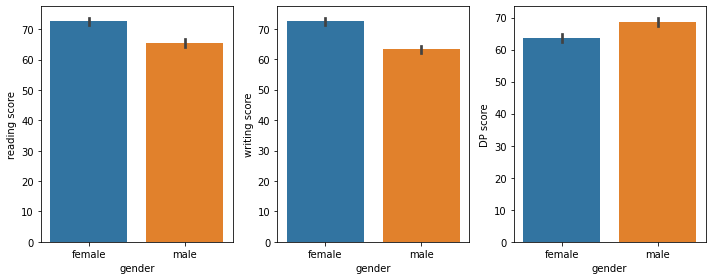

In [20]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'reading score', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'gender', y = 'writing score', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'gender', y = 'DP score', data = df)

plt.tight_layout()

2. Bar plot of Scores on the basis of Race/Ethnicity

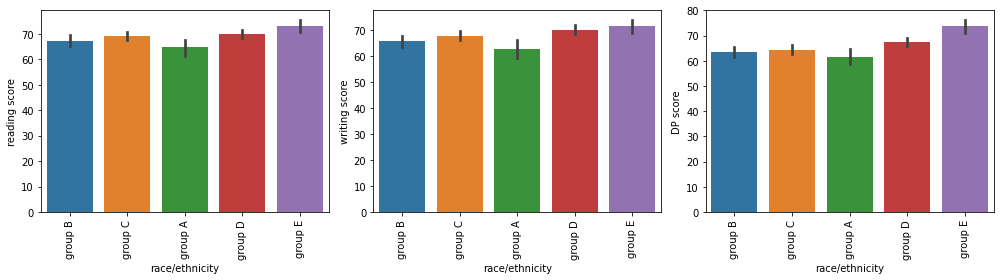

In [21]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'race/ethnicity', y = 'reading score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x = 'race/ethnicity', y = 'writing score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x = 'race/ethnicity', y = 'DP score', data = df)
plt.xticks(rotation = 90)

plt.tight_layout()

People from group E have higher score in all three categories, where as people from group A have the lowest score in all three categories

3. Bar plots of Scores on the basis of Test Prepration Course

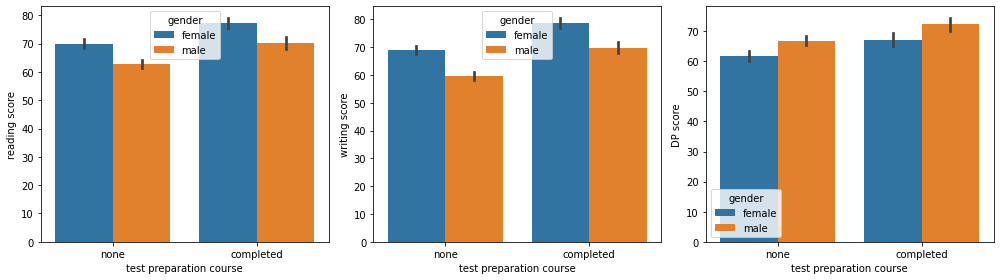

In [22]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'test preparation course', y = 'reading score', hue = 'gender', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'test preparation course', y = 'writing score',hue = 'gender', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'test preparation course', y = 'DP score',hue = 'gender', data = df)

plt.tight_layout()

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

4. Bar Plots of Scores on the basis of Parent's Education Level

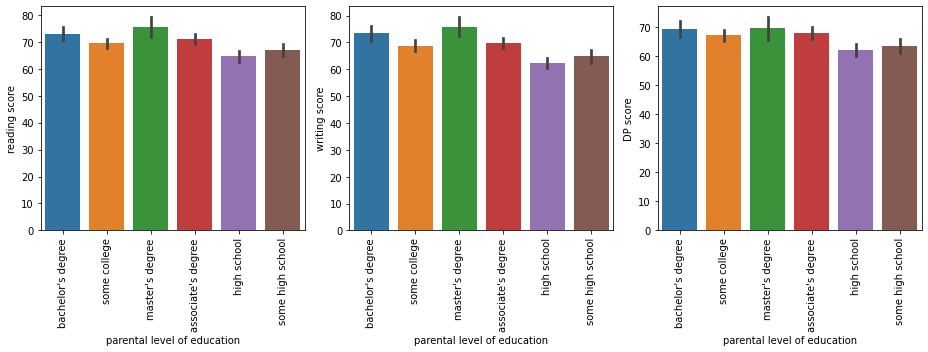

In [23]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.barplot(x = 'parental level of education', y = 'reading score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x = 'parental level of education', y = 'writing score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x = 'parental level of education', y = 'DP score', data = df)
plt.xticks(rotation = 90)

plt.tight_layout()

Student's whose parents have a Master's degree have scored higher compared to others whereas Student's whose parent's went to high school have obtained low marks compared to others

5. Bar Plots of Scores on the basis of Types of Luch

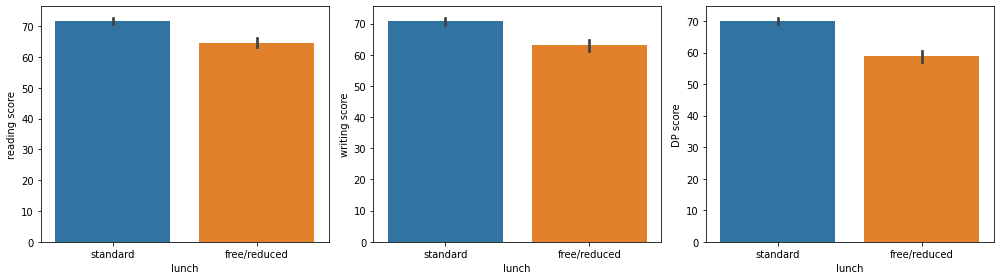

In [11]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'lunch', y = 'reading score', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'lunch', y = 'writing score', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'lunch', y = 'DP score', data = df)


plt.tight_layout()

In [32]:
import warnings
warnings.filterwarnings('ignore')

df['total_score'] = df['DP score'] + df['reading score'] + df['writing score']

In [33]:
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_DP'] = np.where(df['DP score']< passmarks, 'Fail', 'Pass')
df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')

In [34]:
df['status'] = df.apply(lambda x : 'Fail' if x['pass_DP'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)


In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score,pass_DP,pass_reading,pass_writing,status,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,pass,218
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,pass,247
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,pass,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,pass,148
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,pass,229


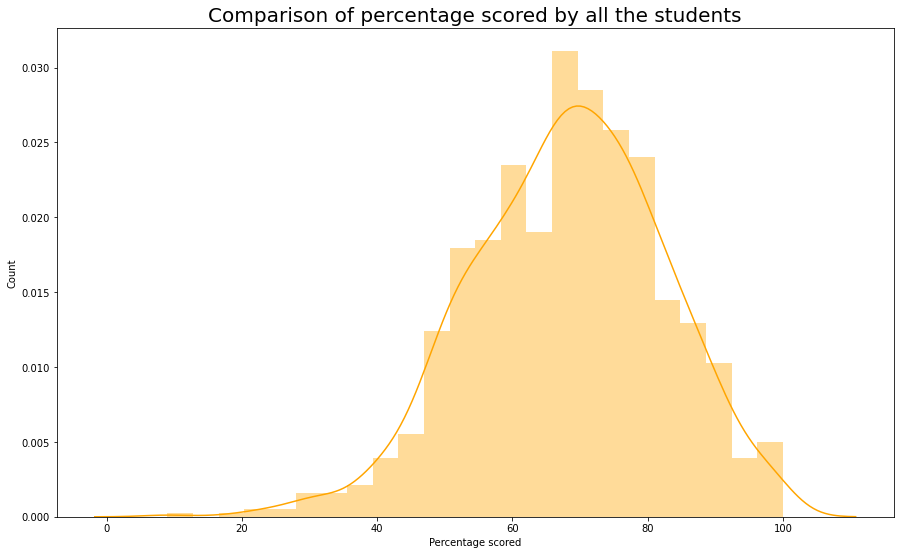

In [36]:
from math import * 
import warnings
warnings.filterwarnings('ignore')

df['percentage'] = df['total_score']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(df['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [37]:
def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

df['grades'] = df.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

df['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# label encoding for lunch
df['lunch'] = le.fit_transform(df['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
df['parental level of education'] = le.fit_transform(df['parental level of education'])

#label encoding for gender
df['gender'] = le.fit_transform(df['gender'])

# label encoding for pass_math
df['pass_DP'] = le.fit_transform(df['pass_DP'])

# label encoding for pass_reading
df['pass_reading'] = le.fit_transform(df['pass_reading'])

# label encoding for pass_writing
df['pass_writing'] = le.fit_transform(df['pass_writing'])

# label encoding for status
df['grades'] = le.fit_transform(df['grades'])
df['status'] = le.fit_transform(df['status'])

In [43]:
x = df.iloc[:,:14]
y = df.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_test.head())

(750, 14)
(750,)
(250, 14)
(250,)
     gender  race/ethnicity  parental level of education  lunch  \
726       0               5                            0      1   
243       1               5                            4      1   
342       0               2                            2      1   
976       1               2                            4      0   
919       1               2                            4      1   

     test preparation course  DP score  reading score  writing score  pass_DP  \
726                        0        65             75             77        1   
243                        1        59             51             43        1   
342                        0        69             76             74        1   
976                        0        60             62             60        1   
919                        0        91             96             91        1   

     pass_reading  pass_writing  status  total_score  percentage  
726      

In [45]:
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# Machine learning technique - Random Forest 

In [46]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


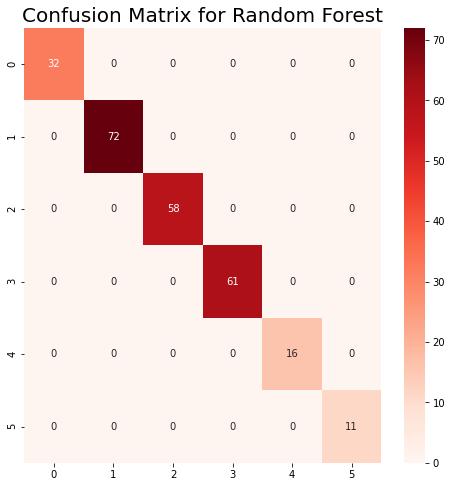

In [47]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()